# Read EPANET result files generated by MIKE+

In this notebook we give examples how to read EPANET result files **res** generated by MIKE+. Most of the functionality is the same as reading res1d files, which is described in [res1d.ipynb](res1d.ipynb).

In [1]:
from mikeio1d import Res1D
from mikeio1d.query import QueryDataNode, QueryDataReach

## EPANET res file

Read entire res file into a data frame. Here we use results from a standard **Net1.inp** (EPANET Example Network 1) distributed together with EPANET 2.2 and imported into MIKE+.

In [2]:
file_path = "../tests/testdata/Epanet.res"
res = Res1D(file_path)
df = res.read()

Let's peek at the full data frame coming from EPANET result.

In [3]:
df.head()

,Demand:10,Head:10,Pressure:10,WaterQuality:10,Demand:11,Head:11,Pressure:11,WaterQuality:11,Demand:12,Head:12,...,ReactorRate:31,FrictionFactor:31,Flow:9,Velocity:9,HeadlossPer1000Unit:9,AvgWaterQuality:9,StatusCode:9,Setting:9,ReactorRate:9,FrictionFactor:9
2022-10-13 00:00:00,0.0,306.125000,89.716995,0.5,9.463531,300.298187,83.890175,0.5,9.463531,295.677277,...,0.0,0.048410,117.737534,0.0,-62.285000,0.0,3.0,1.0,0.0,0.0
2022-10-13 01:00:00,0.0,306.862823,90.454834,0.5,9.463531,301.137360,84.729355,0.5,9.463531,296.611542,...,0.0,0.048470,116.627487,0.0,-63.022831,0.0,3.0,1.0,0.0,0.0
2022-10-13 02:00:00,0.0,307.325562,90.917557,0.5,11.356236,301.663696,85.255707,0.5,11.356236,297.515137,...,0.0,0.048168,115.925919,0.0,-63.485558,0.0,3.0,1.0,0.0,0.0
2022-10-13 03:00:00,0.0,307.824982,91.416985,0.5,11.356236,302.231873,85.823860,0.5,11.356236,298.146301,...,0.0,0.048195,115.163910,0.0,-63.984989,0.0,3.0,1.0,0.0,0.0
2022-10-13 04:00:00,0.0,308.052460,91.644470,0.5,13.248942,302.490662,86.082672,0.5,13.248942,298.756622,...,0.0,0.047632,114.815155,0.0,-64.212471,0.0,3.0,1.0,0.0,0.0


The available quantities are:

In [4]:
res.quantities

['Demand',
 'Head',
 'Pressure',
 'WaterQuality',
 'Flow',
 'Velocity',
 'HeadlossPer1000Unit',
 'AvgWaterQuality',
 'StatusCode',
 'Setting',
 'ReactorRate',
 'FrictionFactor']

From the above list the following quantities are defined on pipes (reaches):
* Average Water Quality
* Flow
* Friction Factor
* Headloss per 1000Unit
* Reactor Rate
* Setting
* Status Code
* Velocity

Quantities defined on junctions (nodes):
* Head
* Pressure
* Water Demand
* Water Quality

Here we retrieve flow in a pipe with ID **10**, which has connecting junctions **10** and **11**

In [5]:
pipe_id = '10'
pipe_data_item = res.reaches[pipe_id]
node_start = res.data.Nodes[pipe_data_item.StartNodeIndex]
node_end = res.data.Nodes[pipe_data_item.EndNodeIndex]
print(f'Start node ID: {node_start.ID}')
print(f'End node ID: {node_end.ID}')

Start node ID: 10
End node ID: 11


In [6]:
df[['Flow:10', 'Pressure:10', 'Pressure:11']]

,Flow:10,Pressure:10,Pressure:11
2022-10-13 00:00:00,117.737534,89.716995,83.890175
2022-10-13 01:00:00,116.627487,90.454834,84.729355
2022-10-13 02:00:00,115.925919,90.917557,85.255707
2022-10-13 03:00:00,115.163910,91.416985,85.823860
2022-10-13 04:00:00,114.815155,91.644470,86.082672
2022-10-13 05:00:00,114.398529,91.915298,86.390823
2022-10-13 06:00:00,114.390770,91.920341,86.396553
2022-10-13 07:00:00,114.311264,91.971931,86.455261
2022-10-13 08:00:00,113.833015,92.281364,86.807350
2022-10-13 09:00:00,113.436226,92.537125,87.098404


Let's plot the above results, but this time we will retrieve the data using **QueryDataReach** and **QueryDataNode**. 

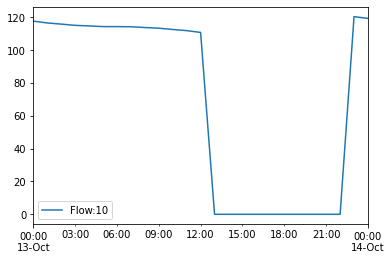

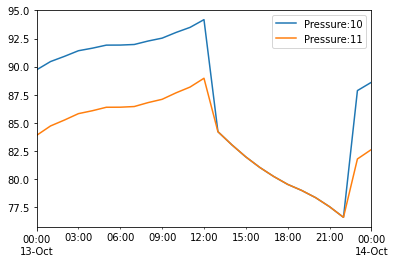

In [7]:
pipe_query = QueryDataReach('Flow', pipe_id)
df_pipe = res.read(queries=[pipe_query])
df_pipe.plot();

node_start_query = QueryDataNode('Pressure', node_start.ID)
node_end_query = QueryDataNode('Pressure', node_end.ID)
df_nodes = res.read(queries=[node_start_query, node_end_query])
df_nodes.plot();